# Linear models in TensorFlow 2.0

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
tf.__version__

'2.1.0'

In [3]:
tf.test.gpu_device_name()

'/device:GPU:0'

King County housing dataset

In [4]:
housing: pd.DataFrame = pd.read_csv('data/kc_house.csv')
housing_mat: np.ndarray = housing.to_numpy()
housing.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


## Section 1 Loss functions
### Subsection 1.1 Visulizing loss functions

In [15]:
xs_: np.ndarray = np.linspace(-2, 2)
loss_fns: tuple = ('MAE', 'MSE')


def compute_ys(xs: np.ndarray, fn: str) -> list:
    loss_functions: dict = dict(MAE=tf.keras.losses.mae,
                                MSE=tf.keras.losses.mse)
    ys: list = []
    for x in xs:
        res = loss_functions[fn](np.zeros(5), np.repeat(x, 5))
        ys.append(res.numpy())
    
    return ys


ys_: dict = {loss: compute_ys(xs_, loss) for loss in loss_fns}

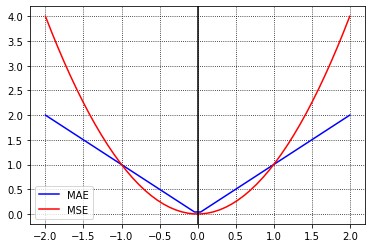

In [19]:
cs: tuple = ('b', 'r')

for i, loss in enumerate(loss_fns):
    plt.plot(xs_, ys_[loss], label=loss, c=cs[i])
plt.axvline(0, color='k')
plt.legend()
plt.grid(c='k', ls=':')
# plt.savefig('out/plots/loss_mae_mse.png', dpi=600, transparent=True)
plt.show()

In [24]:
scalar = tf.Variable(1.0, tf.float32)
targets = np.array([ 2.,  4.,  6.,  8., 10.], dtype=np.float32)
features = np.array([1., 2., 3., 4., 5.], dtype=np.float32)


def model(scalar, features=features):
  	return scalar * features


def loss_function(scalar, features=features, targets=targets):
    predictions = model(scalar, features)
    return tf.keras.losses.mae(targets, predictions)


print(loss_function(scalar).numpy())

3.0


## Section 2 Optimizers

In [20]:
opt = tf.keras.optimizers.Adam()

In [ ]:
for j in range(1_000):
    # Minimize the loss function and print the loss
    opt.minimize(lambda: loss_function(intercept, slope), var_list=[intercept, slope])
    print(loss_function(intercept, slope))

## Section 3 Set up a linear regression

We will create two tensors, one for the property's prices and another for the property's lot size. We will take the natural logarithms of both tensors.

We will define the model and the loss function. We will then evaluate the loss function for two different values of intercept and slope.

In [31]:
price_log: np.ndarray = np.log(housing.price).to_numpy(dtype=np.float32)
size_log: np.ndarray = np.log(housing.sqft_lot).to_numpy(dtype=np.float32)

In [25]:
def linear_regression(intercept, slope, features):
    """Linear regression model."""
    return intercept + features * slope

In [34]:
def loss_function(intercept, slope, targets, features):
    """MSE."""
    predictions = linear_regression(intercept, slope, features)
    return tf.keras.losses.mse(targets, predictions)

In [37]:
print(loss_function(0.1, 0.1, targets=price_log, features=size_log).numpy())
print(loss_function(0.1, 0.5, targets=price_log, features=size_log).numpy())

145.44653
71.866
